<a href="https://colab.research.google.com/github/AJH0625/DeepLearning-Study/blob/main/3%EC%A3%BC%EC%B0%A8/%EC%8B%A0%EA%B2%BD%EB%A7%9D(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##3.2.2 계단 함수 구현하기

In [1]:
def step_function(x):
  if x>0:
    return 1
  else:
    return 0

In [4]:
def step_function(x):
  y=x>0
  return y.astype(np.int)

In [5]:
import numpy as np
x=np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [6]:
y=x>0
y

array([False,  True,  True])

In [7]:
y=y.astype(np.int)
y

array([0, 1, 1])

##3.2.3 계단 함수의 그래프

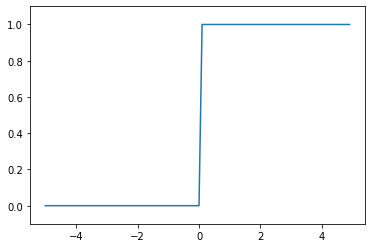

In [8]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
  return np.array(x>0, dtype=np.int)

x=np.arange(-5.0, 5.0, 0.1)
y=step_function(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

##3.2.4 시그모이드 함수 구현하기

In [9]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

x=np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [10]:
t = np.array([1.0, 2.0, 3.0])
1.0 + t

array([2., 3., 4.])

In [ ]:
1.0/t

array([1.        , 0.5       , 0.33333333])

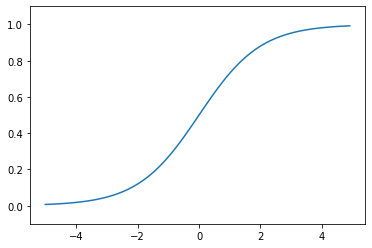

In [ ]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

##3.2.7 ReLU 함수

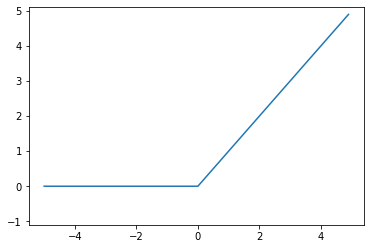

In [13]:
def relu(x):
  return np.maximum(0,x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x,y)
plt.ylim(-1.1, 5.1)
plt.show()

## Tanh 함수 구현

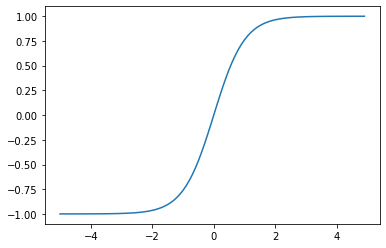

In [15]:
def tanh(x):
  return np.sinh(x)/np.cosh(x)

x = np.arange(-5.0, 5.0, 0.1)
y = tanh(x)
plt.plot(x,y)
plt.show()

##3.3.1 다차원 배열

In [ ]:
import numpy as np
#1차원 배열
A = np.array([1,2,3,4]) 
print(A)

[1 2 3 4]


In [ ]:
np.ndim(A) #배열의 차원 수

1

In [ ]:
A.shape #배열의 형상

(4,)

In [ ]:
A.shape[0]

4

In [ ]:
#2차원 배열
B = np.array([[1,2], [3,4], [5,6]])
print(B)

[[1 2]
 [3 4]
 [5 6]]


In [ ]:
np.ndim(B)

2

In [ ]:
B.shape

(3, 2)

##3.3.2 행렬의 곱

In [ ]:
A = np.array([[1,2],[3,4]])
A.shape

(2, 2)

In [ ]:
B = np.array([[5,6], [7,8]])
B.shape

(2, 2)

In [ ]:
np.dot(A,B)

array([[19, 22],
       [43, 50]])

2x3 행렬과 3x2 행렬의 곱

In [ ]:
A= np.array([[1,2,3], [4,5,6]])
A.shape

(2, 3)

In [ ]:
B = np.array([[1,2],[3,4],[5,6]])
B.shape

(3, 2)

In [ ]:
np.dot(A,B)

array([[22, 28],
       [49, 64]])

A가 2차원 행렬, B가 1차원 배열일 때

In [ ]:
A = np.array([[1,2],[3,4],[5,6]])
A.shape

(3, 2)

In [ ]:
B = np.array([7,8])
B.shape

(2,)

In [ ]:
np.dot(A,B)

array([23, 53, 83])

##3.3.3 신경망에서의 행렬 곱

In [ ]:
X = np.array([1,2])
X.shape

(2,)

In [ ]:
W = np.array([[1,3,5],[2,4,6]])
print(W)

[[1 3 5]
 [2 4 6]]


In [ ]:
W.shape

(2, 3)

In [ ]:
Y = np.dot(X, W)
print(Y)

[ 5 11 17]


##3.4.2 각 층의 신호 전달 구현하기

In [ ]:
# 입력층 ~ 1층
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape) #(2,3)
print(X.shape) #(2,)
print(B1.shape) #(3,)

A1 = np.dot(X, W1) + B1

Z1 = sigmoid(A1)

print(A1)
print(Z1)

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [ ]:
# 1층~2층
W2 = np.array([[0.1, 0.4],[0.2, 0.5],[0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


In [ ]:
# 2층~출력층
def identity_function(x):
  return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

##3.4.3 구현 정리

In [ ]:
def init_network(): #가중치와 편향 초기화
  network = {}
  network['W1'] = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
  network['b1'] = np.array([0.1, 0.2, 0.3])
  network['W2'] = np.array([[0.1, 0.4],[0.2, 0.5], [0.3, 0.6]])
  network['b2'] = np.array([0.1, 0.2])
  network['W3'] = np.array([[0.1, 0.3],[0.2, 0.4]])
  network['b3'] = np.array([0.1, 0.2])

  return network #매개변수 저장

def forward(network, x): #순방향 전달
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = identity_function(a3)

  return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]
